# 
Exploratory Data Analysis of Rideshare Data

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Latex

# seaborn color theme
sns.set_theme(style="ticks")

# Global variables
DAYS = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
TIMES_OF_DAY = ['Breakfast','Lunch','Dinner']

## Data Preparation and Cleaning

### Load Data

In [69]:
df = pd.read_csv('data.csv')

### Check data types

In [70]:
df.dtypes

shift_id                 int64
date                    object
start_location          object
end_location_street     object
end_location_zip         int64
expected_earnings      float64
actual_earnings        float64
duration               float64
distance               float64
time_requested          object
dtype: object

### Prep and Formatting

#### Ensuring Proper Data Types

In [71]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['time_requested'] = df['time_requested'].str.replace(':', '').astype('int')

df['end_location_zip'] = df['end_location_zip'].astype('object')

#### Creating New Variables
We create a `day_of_week` variable signifying the day of the week using the `date` column. We also create a `time_of_day` that signifies whether the delivery was during breakfast, lunch, or dinner.For our analysis, the grouping of times are:  

- **0600 - 1059** - Breakfast
- **1100 - 1559** - Lunch
- **1600 - 2359** - Dinner

In [72]:
# Create day of week column
df['day_of_week'] = df['date'].apply(lambda x: DAYS[x.weekday()])


def calculate_time_of_day(time_requested: int) -> str:
    """Calculate the time of day by passing an integer representing military time
    and returning the proper time of day."""
    if (time_requested >= 600) & (time_requested < 1059):
        return 'Breakfast'
    if (time_requested >= 1100) & (time_requested < 1559):
        return 'Lunch'
    else:
        return 'Dinner'

# Create time_of_day column
df['time_of_day'] = df['time_requested'].apply(lambda x: calculate_time_of_day(x))

# Convert to proper data types
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=DAYS, ordered=True)
df['time_of_day'] = pd.Categorical(df['time_of_day'], categories=TIMES_OF_DAY, ordered=True)

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

#### Initial Data Overview

In [73]:
df.head(10)

,shift_id,date,start_location,end_location_street,end_location_zip,expected_earnings,actual_earnings,duration,distance,time_requested,day_of_week,time_of_day
0,110,2024-01-10,McDonald's (6680 N 5th St),W Deer Springs Way,89084,2.25,2.25,18.88,1.0,1047,Tuesday,Breakfast
1,110,2024-01-10,Sierra Gold (6929 N Aliante Pkwy),Acacia Grove St,89031,3.08,3.08,18.47,6.3,1057,Tuesday,Breakfast
2,110,2024-01-10,KFC (5700 Losee Rd),N Lamb Blvd,89115,7.77,7.71,25.57,8.5,1126,Tuesday,Lunch
3,110,2024-01-10,Denny's (420 E Deer Springs Way),Calumet Point St,89081,6.79,6.79,20.40,7.4,1148,Tuesday,Lunch
4,110,2024-01-10,Jack in the Box (6345 N Losee Rd),Granite Ash Ave,89081,3.33,3.33,13.83,3.8,1219,Tuesday,Lunch
5,110,2024-01-10,Harold's Chicken Shack (6320 Simmons St),Sassa St,89130,5.07,5.07,11.05,3.3,1237,Tuesday,Lunch
6,110,2024-01-10,Saladworks (6572 N Decatur Blvd),Rialto Rd,89108,5.28,5.28,20.38,7.8,1249,Tuesday,Lunch
7,110,2024-01-10,Roberto's Taco Shop (4725 N Rancho Dr),Red Saturn Dr,89130,4.27,4.27,14.13,4.0,1321,Tuesday,Lunch
8,111,2024-01-10,Chili's Grill & Bar (6505 N Decautr Blvd),E Rome Blvd,89084,4.03,4.03,16.98,6.4,1634,Tuesday,Dinner
9,111,2024-01-10,Zen Curry Dining (225 W Centennial Pkwy),Legend Falls St,89081,17.04,15.58,31.35,6.5,1701,Tuesday,Dinner


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   shift_id             189 non-null    int64         
 1   date                 189 non-null    datetime64[ns]
 2   start_location       189 non-null    object        
 3   end_location_street  189 non-null    object        
 4   end_location_zip     189 non-null    object        
 5   expected_earnings    189 non-null    float64       
 6   actual_earnings      189 non-null    float64       
 7   duration             189 non-null    float64       
 8   distance             189 non-null    float64       
 9   time_requested       189 non-null    int64         
 10  day_of_week          189 non-null    category      
 11  time_of_day          189 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 15.7+ KB


In [75]:
df.dtypes

shift_id                        int64
date                   datetime64[ns]
start_location                 object
end_location_street            object
end_location_zip               object
expected_earnings             float64
actual_earnings               float64
duration                      float64
distance                      float64
time_requested                  int64
day_of_week                  category
time_of_day                  category
dtype: object

##### Separate Numerical and Categorical Variables

In [76]:
numerical_df = df.select_dtypes(include=['number']).drop('shift_id', axis=1)
categorical_df = df.select_dtypes(include=['category', 'object'])

#### Summary Statistics for Numerical Variables

In [77]:
print('Variance:\n', numerical_df.var(), '\n')
print('Std. Dev:\n', numerical_df.std(), '\n')
print('Skewness:\n', numerical_df.skew(), '\n')
print('Kurtosis:\n', numerical_df.kurtosis(), '\n')
print('Max:\n', numerical_df.max(), '\n')
print('Min:\n', numerical_df.min(), '\n')

Variance:
 expected_earnings         9.616479
actual_earnings          10.492708
duration                 52.725151
distance                  6.634093
time_requested       112024.145784
dtype: float64 

Std. Dev:
 expected_earnings      3.101045
actual_earnings        3.239245
duration               7.261209
distance               2.575673
time_requested       334.700083
dtype: float64 

Skewness:
 expected_earnings    1.445979
actual_earnings      1.506197
duration             1.041596
distance             0.925953
time_requested      -0.564028
dtype: float64 

Kurtosis:
 expected_earnings    2.427109
actual_earnings      2.557246
duration             1.398412
distance             0.806866
time_requested      -0.627893
dtype: float64 

Max:
 expected_earnings      18.32
actual_earnings        18.84
duration               48.85
distance               14.30
time_requested       1927.00
dtype: float64 

Min:
 expected_earnings      2.00
actual_earnings        2.00
duration               

##### Dispersion of Data

**Position**

In [78]:
numerical_df.quantile([.25,.5,.75])

,expected_earnings,actual_earnings,duration,distance,time_requested
0.25,4.46,4.43,13.58,3.3,1207.0
0.50,5.70,5.66,17.37,4.7,1601.0
0.75,7.90,7.90,22.80,6.5,1738.0


In [79]:
# This gives the interquartile range (IQR)
numerical_df.quantile(.75) - numerical_df.quantile(.25)

expected_earnings      3.44
actual_earnings        3.47
duration               9.22
distance               3.20
time_requested       531.00
dtype: float64

#### Summary Statistics for Categorical Variables

In [80]:
categorical_df.describe(include=['object', 'category'])

,start_location,end_location_street,end_location_zip,day_of_week,time_of_day
count,189,189,189,189,189
unique,111,172,17,7,3
top,Roberto's Taco Shop (6320 Simmons St),W Deer Springs Way,89084,Thursday,Dinner
freq,10,3,51,35,95


### Univariate Analysis

#### Numerical Variable Analysis

##### **Histograms**

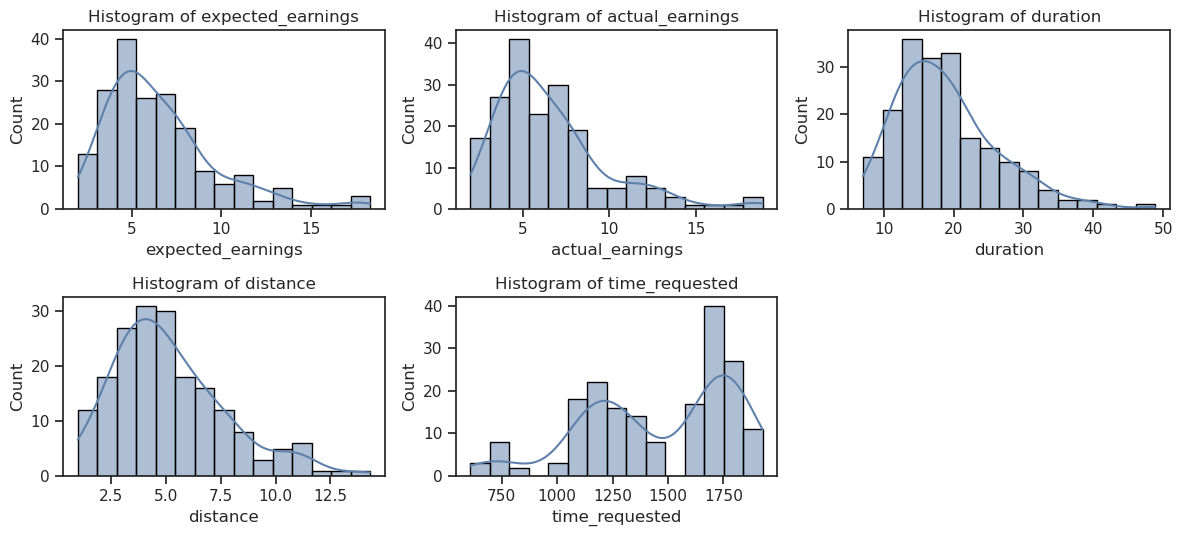

In [90]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the DataFrame's columns and create a histogram on each subplot
for i, col in enumerate(numerical_df.columns):
    sns.histplot(numerical_df[col], bins=15, kde=True, ax=axes[i], color='#5E81AC', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')

# Hide any unused subplot axes in case of an odd number of columns
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **Box Plots**

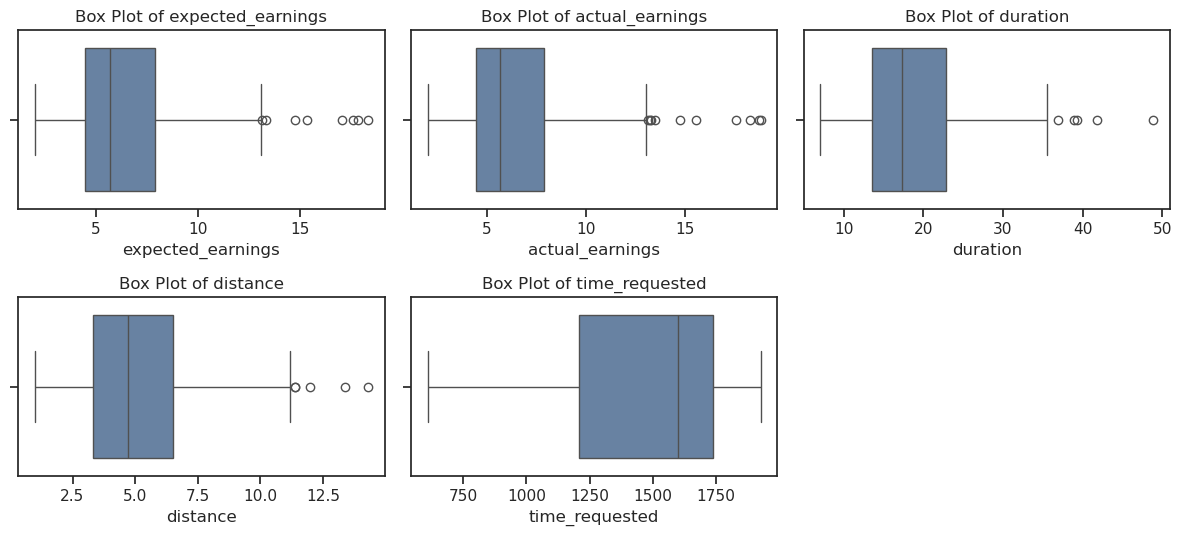

In [105]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

for i, var in enumerate(numerical_df.columns):
    row, col = i // 3, i % 3
    sns.boxplot(x=numerical_df[var], ax=axes[row, col], color='#5E81AC')
    axes[row, col].set_title(f'Box Plot of {var}')

# Hide any unused subplot axes in case of an odd number of columns
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

axes_flat = axes.flatten()

for j in range(i + 1, len(axes_flat)):
    axes_flat[j].set_visible(False)  # Hide unused subplots
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Categorical Variable Analysis

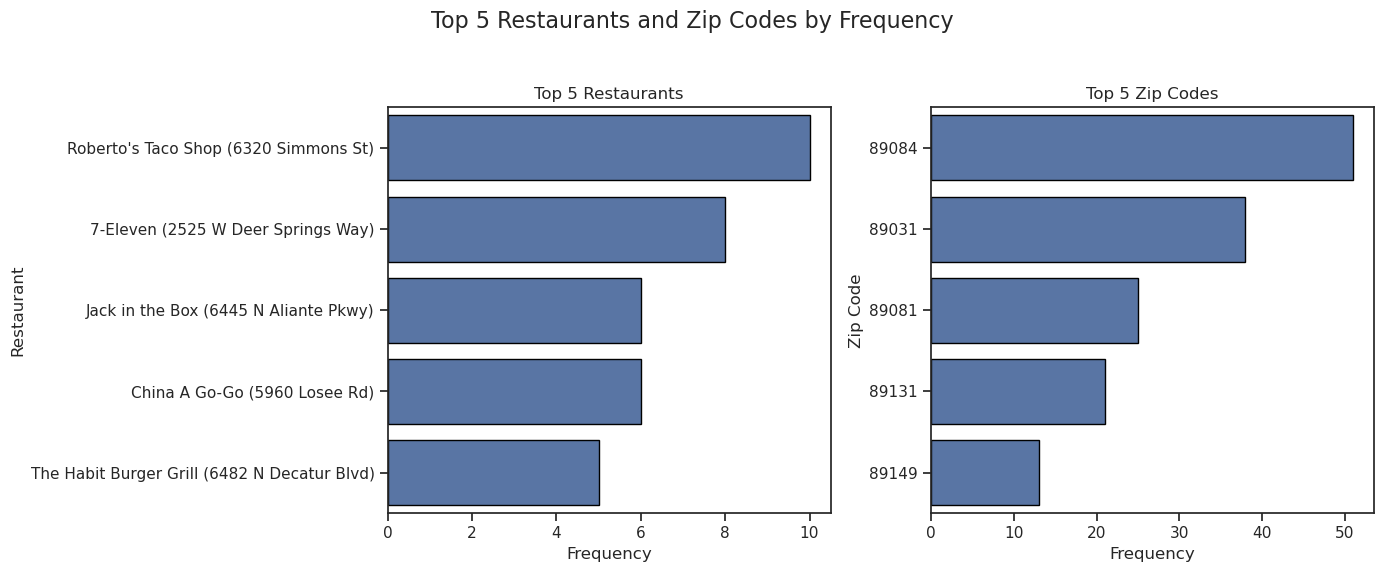

In [114]:
top_5_restaurants = df['start_location'].value_counts().head(5)
top_5_zip_codes = df['end_location_zip'].value_counts().head(5)

fig, axes = plt.sub
plots(1, 2, figsize=(14, 6))
fig.suptitle('Top 5 Restaurants and Zip Codes by Frequency', fontsize=16)

sns.barplot(x=top_5_restaurants.values, legend=False, y=top_5_restaurants.index, ax=axes[0], edgecolor='black')
axes[0].set_title('Top 5 Restaurants')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Restaurant')

sns.barplot(x=top_5_zip_codes.values, legend=False, y=top_5_zip_codes.index.astype(str), ax=axes[1], edgecolor='black')
axes[1].set_title('Top 5 Zip Codes')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Zip Code')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

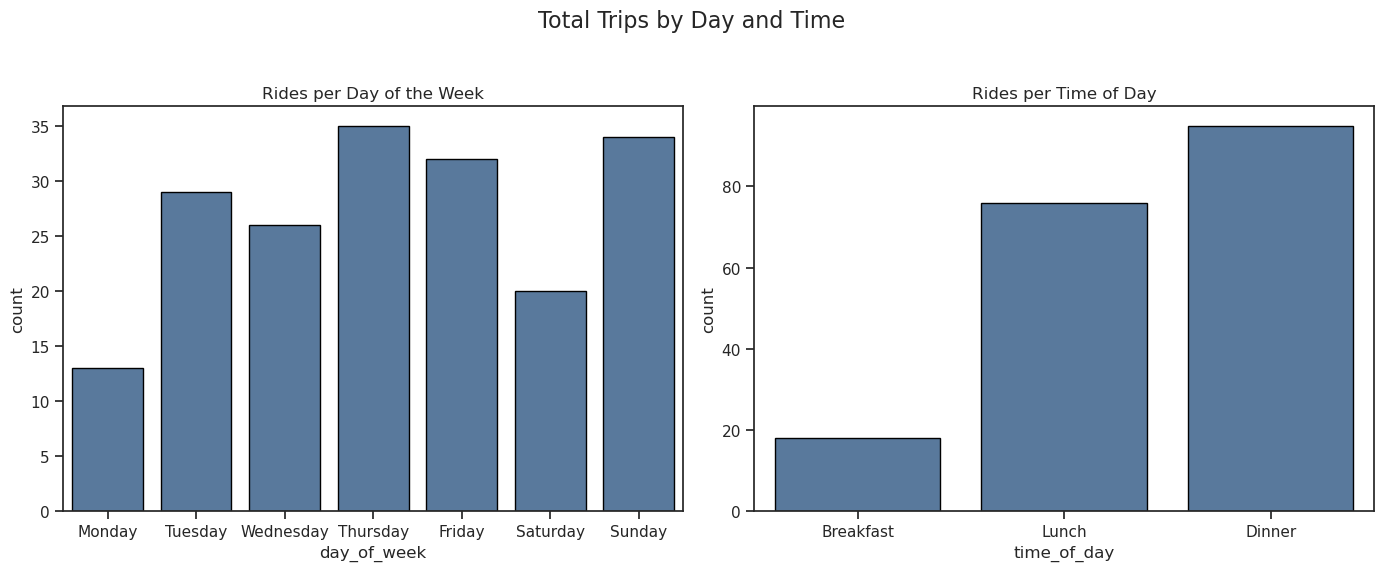

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Total Trips by Day and Time', fontsize=16)


sns.countplot(x='day_of_week', ax=axes[0], data=categorical_df, 
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 
              color='#4E79A7', edgecolor='black')
axes[0].set_title('Rides per Day of the Week')



sns.countplot(x='time_of_day', ax=axes[1], data=categorical_df, 
              order=['Breakfast', 'Lunch', 'Dinner'], 
              color='#4E79A7', edgecolor='black')
axes[1].set_title('Rides per Time of Day')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
#avg_earnings_by_day = df.groupby('day_of_week', observed=True)['actual_earnings'].sum().reset_index() / df.groupby('day_of_week')['actual_earnings'].count().reset_index()
avg_earnings_by_day = df.groupby('day_of_week')['actual_earnings'].sum().reset_index()
avg_earnings_by_time = df.groupby('time_of_day', observed=True)['actual_earnings'].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot average earnings by day of week
sns.barplot(x='day_of_week', y='actual_earnings', data=avg_earnings_by_day, ax=axes[0], edgecolor='black')
axes[0].set_title('Average Earnings by Day of Week')
axes[0].set_ylabel('Average Earnings ($)')
axes[0].set_xlabel('Day of Week')

# Plot average earnings by time of day
sns.barplot(x='time_of_day', y='actual_earnings', data=avg_earnings_by_time, ax=axes[1], edgecolor='black')
axes[1].set_title('Average Earnings by Time of Day')
axes[1].set_ylabel('')  # Remove y-label for the second plot to avoid repetition
axes[1].set_xlabel('Time of Day')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Distribution of Earnings

In [4]:
earnings_by_day = pd.DataFrame(df.groupby(['date','time_of_day'], observed=True)['actual_earnings'].mean())
earnings_by_day = earnings_by_day.reset_index()

earnings_by_day['day'] = earnings_by_day['date'].apply(lambda x: days[x.weekday()])
earnings_by_day['day'] = pd.Categorical(earnings_by_day['day'], categories=days, ordered=True)

earnings_by_day.groupby(['day','time_of_day'], observed=True)['actual_earnings'].mean()

KeyError: 'time_of_day'

0      5.33
1     32.45
2     31.86
11    48.10
20    21.95
31     4.08
32    27.58
33     9.72
Name: actual_earnings, dtype: float64

In [157]:
df.groupby('day_of_week')['day_of_week'].count()

/tmp/ipykernel_116/1234851423.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('day_of_week')['day_of_week'].count()


day_of_week
Sunday       20
Monday       34
Tuesday      13
Wednesday    29
Thursday     26
Friday       35
Saturday     32
Name: day_of_week, dtype: int64

### Bivariate Analysis

#### Correlations

In [27]:
table = r"""
\begin{array}{cccc}
 & \text{expected\_earnings} & \text{actual\_earnings} & \text{distance} & \text{duration} \\
\hline
\text{expected\_earnings} & 1.000000 & 0.984078 & 0.382429 & 0.540154 \\
\text{actual\_earnings} & 0.984078 & 1.000000 & 0.378827 & 0.542720 \\
\text{distance} & 0.382429 & 0.378827 & 1.000000 & 0.729761 \\
\text{duration} & 0.540154 & 0.542720 & 0.729761 & 1.000000 \\
\end{array}
"""

Latex(table)


<IPython.core.display.Latex object>

#### Pair Plots

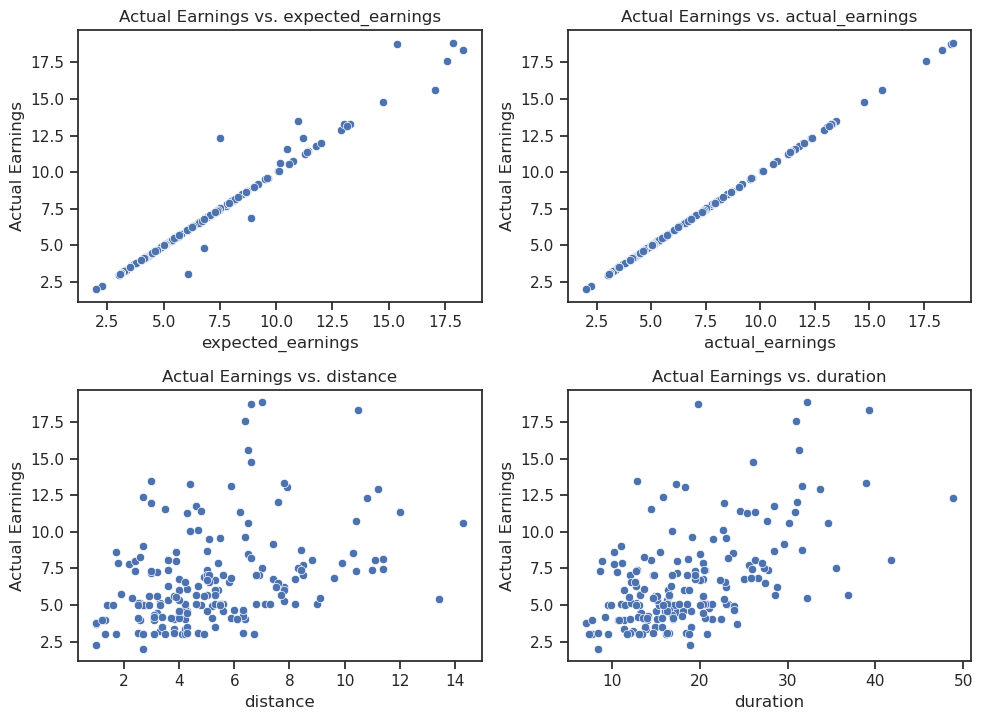

In [82]:
# Creating a 2x2 grid for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over your selected variables and create scatter plots
for i, var in enumerate(numerics.columns.to_list()):
    sns.scatterplot(x=df[var], y=df['actual_earnings'], ax=axes[i])
    axes[i].set_title(f'Actual Earnings vs. {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Actual Earnings')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Feature Engineering

#### Earnings Per Hour

In [393]:
total_earnings_by_day_time = df.groupby(['day_of_week', 'time_of_day'], observed=True)['actual_earnings'].sum()
total_minutes_by_day_time = df.groupby(['day_of_week', 'time_of_day'], observed=True)['duration'].sum()

eph_by_day_time = 60 * (total_earnings_by_day_time / total_minutes_by_day_time)

In [394]:
latex_code_updated = r"""
\[
\begin{array}{l l r}
\hline
\textbf{Day of Week} & \textbf{Time of Day} & \textbf{Earnings Per Hour (\$)} \\
\hline
\text{Sunday} & \text{Lunch} & 19.68 \\
              & \text{Dinner} & 25.30 \\
\text{Monday} & \text{Lunch} & 19.44 \\
              & \text{Dinner} & 18.84 \\
\text{Tuesday} & \text{Lunch} & 18.74 \\
               & \text{Dinner} & 27.41 \\
\text{Wednesday} & \text{Breakfast} & 10.40 \\
                 & \text{Lunch} & 20.64 \\
                 & \text{Dinner} & 19.23 \\
\text{Thursday} & \text{Breakfast} & 13.84 \\
                & \text{Lunch} & 23.84 \\
                & \text{Dinner} & 21.61 \\
\text{Friday} & \text{Breakfast} & 9.21 \\
              & \text{Lunch} & 24.29 \\
              & \text{Dinner} & 22.46 \\
\text{Saturday} & \text{Breakfast} & 17.73 \\
                & \text{Lunch} & 18.58 \\
                & \text{Dinner} & 25.76 \\
\hline
\end{array}
\]
"""

display(Latex(latex_code_updated))


<IPython.core.display.Latex object>

#### Earnings Per 5 Miles

In [36]:
total_miles_per_day_time = df.groupby(['day_of_week', 'time_of_day'], observed=True)['distance'].sum()
epm_by_day_time = total_earnings_by_day_time / total_miles_per_day_time

In [37]:
from IPython.display import Latex

latex_code_for_earnings_per_5_miles = r"""
\[
\begin{array}{l l r}
\hline
\textbf{Day of Week} & \textbf{Time of Day} & \textbf{Earnings per 5 Miles (\$)} \\
\hline
\text{Sunday} & \text{Lunch} & 5.30 \\
              & \text{Dinner} & 7.73 \\
\text{Monday} & \text{Lunch} & 5.83 \\
              & \text{Dinner} & 6.58 \\
\text{Tuesday} & \text{Lunch} & 5.32 \\
               & \text{Dinner} & 10.88 \\
\text{Wednesday} & \text{Breakfast} & 3.76 \\
                 & \text{Lunch} & 5.38 \\
                 & \text{Dinner} & 5.68 \\
\text{Thursday} & \text{Breakfast} & 5.65 \\
                & \text{Lunch} & 6.03 \\
                & \text{Dinner} & 6.93 \\
\text{Friday} & \text{Breakfast} & 3.68 \\
              & \text{Lunch} & 7.41 \\
              & \text{Dinner} & 6.58 \\
\text{Saturday} & \text{Breakfast} & 5.57 \\
                & \text{Lunch} & 6.01 \\
                & \text{Dinner} & 7.74 \\
\hline
\end{array}
\]
"""

display(Latex(latex_code_for_earnings_per_5_miles))

<IPython.core.display.Latex object>

In [399]:
5 * epm_by_day_time

day_of_week  time_of_day
Friday       Breakfast       3.675325
             Dinner          6.583655
             Lunch           7.406250
Monday       Dinner          6.581967
             Lunch           5.833333
Saturday     Breakfast       5.574074
             Dinner          7.740780
             Lunch           6.011013
Sunday       Dinner          7.726974
             Lunch           5.302657
Thursday     Breakfast       5.648374
             Dinner          6.928687
             Lunch           6.029284
Tuesday      Dinner         10.884444
             Lunch           5.323770
Wednesday    Breakfast       3.764000
             Dinner          5.680328
             Lunch           5.379653
dtype: float64